# Goal

This project is carried out to develop a recommendation system for amazon products (electronics products). I am using in this project a dataset from **Amazon Reviews data** that can be found [here](http://jmcauley.ucsd.edu/data/amazon/).

# Importing Libraries and Loading the dataset

In [1]:
!pip install surprise==0.1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Electronics.csv", header=None, names=["user_id", "product_id", "rating", "timestamp"])

# Exploratory Data Analysis

In [4]:
df.shape

(20994353, 4)

In [5]:
## The dataset is too big to be handled, so I only took the first 10000 lines
df = df.iloc[0:10000, ]

In [6]:
df.head(20)

,user_id,product_id,rating,timestamp
0,0060009810,A1N070NS9CJQ2I,5.0,1026864000
1,0060009810,A3P0KRKOBQK1KN,5.0,1025913600
2,0060009810,A192HO2ICJ75VU,5.0,1025654400
3,0060009810,A2T278FKFL3BLT,4.0,1025395200
4,0060009810,A2ZUXVTW8RXBXW,5.0,1025222400
5,0060009810,A21JDG4HA6OLPF,4.0,1024963200
6,0060009810,A2NCADLQY962YD,5.0,1024704000
7,0060786817,A2UNA438B0FRA8,5.0,1138233600
8,0060786817,A2NQQSHSQKKGEX,5.0,1137801600
9,0060786817,A5EXND10WD4PM,3.0,1137542400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     10000 non-null  object 
 1   product_id  10000 non-null  object 
 2   rating      10000 non-null  float64
 3   timestamp   10000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 312.6+ KB


In [8]:
df["rating"].value_counts().sort_index()

1.0     883
2.0     423
3.0     691
4.0    1828
5.0    6175
Name: rating, dtype: int64

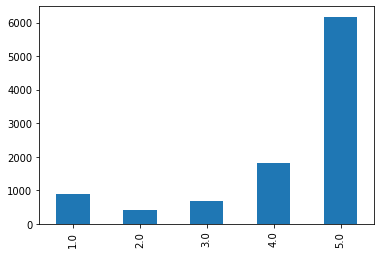

In [9]:
df["rating"].value_counts().sort_index().plot.bar()

The ratings repartition is really skewed on the right i.e. on the highest ratings (e.g. 4, 5).

Now it is time to load the dataset into `Surprise` using its module `Dataset`

In [10]:
reader = Reader(rating_scale=(1, 5))

In [11]:
data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

In [12]:
data.raw_ratings[:10]

[('0060009810', 'A1N070NS9CJQ2I', 5.0, None),
 ('0060009810', 'A3P0KRKOBQK1KN', 5.0, None),
 ('0060009810', 'A192HO2ICJ75VU', 5.0, None),
 ('0060009810', 'A2T278FKFL3BLT', 4.0, None),
 ('0060009810', 'A2ZUXVTW8RXBXW', 5.0, None),
 ('0060009810', 'A21JDG4HA6OLPF', 4.0, None),
 ('0060009810', 'A2NCADLQY962YD', 5.0, None),
 ('0060786817', 'A2UNA438B0FRA8', 5.0, None),
 ('0060786817', 'A2NQQSHSQKKGEX', 5.0, None),
 ('0060786817', 'A5EXND10WD4PM', 3.0, None)]

# User-User collaborative filtering

In [13]:
# Create model object
userBased_model = KNNBasic(sim_options={'user_based': True})

In [14]:
model_user_results = cross_validate(userBased_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2695  1.2272  1.2866  1.2463  1.2935  1.2646  0.0248  
MAE (testset)     0.9926  0.9570  1.0006  0.9717  0.9987  0.9841  0.0170  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.02    0.02    0.08    0.02    0.01    0.03    0.02    


# Item-Item collaborative filtering

In [15]:
# Create model object
itemBased_model = KNNBasic(sim_options={'user_based': False})

In [16]:
model_item_results = cross_validate(itemBased_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2620  1.2757  1.2762  1.2740  1.2572  1.2690  0.0079  
MAE (testset)     0.9775  0.9861  0.9962  0.9927  0.9842  0.9873  0.0066  
Fit time          2.55    2.67    2.12    2.15    1.98    2.29    0.27    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


# Matrix Factorization

In [17]:
# Create model object
matrix_model = SVD()

In [18]:
model_matrix_results = cross_validate(matrix_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1788  1.1919  1.2080  1.1794  1.1540  1.1824  0.0178  
MAE (testset)     0.9051  0.9171  0.9179  0.9125  0.9052  0.9115  0.0055  
Fit time          0.52    0.53    0.53    0.55    0.53    0.53    0.01    
Test time         0.08    0.01    0.01    0.01    0.01    0.03    0.03    


Based on the RMSE values, the matrix factorization is performing the best on the dataset.

# Evaluating the models using **Precision** and **Recall**

In [19]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [20]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [userBased_model, itemBased_model, matrix_model]
model_names = ['model_user', 'model_item', 'model_matrix']

# Create k-fold cross validation object
kf = KFold(n_splits=5)

for k in K:
    for i, model in enumerate(models):
        print(f'>>> k={k}, model={model_names[i]}')
        # Run folder and take average
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> recall  :', round(sum(r) / len(r), 3))
        print('\n')

>>> k=5, model=model_user
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.787
>>> recall  : 0.723


>>> k=5, model=model_item
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.783
>>> recall  : 0.722


>>> k=5, model=model_matrix
>>> precision: 0.829
>>> recall  : 0.685


>>> k=10, model=model_user
Computing the msd similarity matri

Comparing the precision and recall, the matrix factorization model based on Singular Value Decomposition, is performing the best on the dataset for recommendation.

# Prediction of Top-N for each user

In [21]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 5.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [22]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

In [23]:
for i, model in enumerate(models):
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model name: {model_names[i]}')
    print(f'user ID: {user}')
    print(f'top 5 products ID\'s this user would like, sorted by rating highest to lowest: \n{top_n[user]}')
    print('\n')

Computing the msd similarity matrix...
Done computing similarity matrix.
model name: model_user
user ID: 0060009810
top 5 products ID's this user would like, sorted by rating highest to lowest: 
[('A2UNA438B0FRA8', 4.1989), ('A2NQQSHSQKKGEX', 4.1989), ('A5EXND10WD4PM', 4.1989), ('AVJ37XQN3ID16', 4.1989), ('A21NVBFIEQWDSG', 4.1989)]


Computing the msd similarity matrix...
Done computing similarity matrix.
model name: model_item
user ID: 0060009810
top 5 products ID's this user would like, sorted by rating highest to lowest: 
[('A2UNA438B0FRA8', 4.1989), ('A2NQQSHSQKKGEX', 4.1989), ('A5EXND10WD4PM', 4.1989), ('AVJ37XQN3ID16', 4.1989), ('A21NVBFIEQWDSG', 4.1989)]


model name: model_matrix
user ID: 0060009810
top 5 products ID's this user would like, sorted by rating highest to lowest: 
[('AQGRC0D8G7CRL', 4.8418099629494105), ('A2G2K3OC74CPFZ', 4.823483992953798), ('A19N3S7CBSU6O7', 4.820252623217471), ('A1FDDGIDFVN95L', 4.8105512152138346), ('AZ5K5CVZRSN5T', 4.810465295674783)]




# Predicting the rating of products for a particular user (here user with ID: "0060009810")

In [25]:
products = df["product_id"].copy()
products

0       A1N070NS9CJQ2I
1       A3P0KRKOBQK1KN
2       A192HO2ICJ75VU
3       A2T278FKFL3BLT
4       A2ZUXVTW8RXBXW
             ...      
9995    A2CYLBQGS6P11M
9996    A2L6TEVTTR58GK
9997    A2653RDOE8VHB3
9998    A1IYIDWBKOOOVO
9999    A2XZA97XWV4L3L
Name: product_id, Length: 10000, dtype: object

In [28]:
type(products)

pandas.core.series.Series

In [31]:
products = pd.DataFrame(products)

In [32]:
products

,product_id
0,A1N070NS9CJQ2I
1,A3P0KRKOBQK1KN
2,A192HO2ICJ75VU
3,A2T278FKFL3BLT
4,A2ZUXVTW8RXBXW
...,...
9995,A2CYLBQGS6P11M
9996,A2L6TEVTTR58GK
9997,A2653RDOE8VHB3
9998,A1IYIDWBKOOOVO


In [34]:
products['Estimate_Score'] = products['product_id'].apply(lambda x: model.predict("0060009810", x).est)

In [35]:
products

,product_id,Estimate_Score
0,A1N070NS9CJQ2I,4.668397
1,A3P0KRKOBQK1KN,4.497672
2,A192HO2ICJ75VU,4.690196
3,A2T278FKFL3BLT,4.400760
4,A2ZUXVTW8RXBXW,4.575286
...,...,...
9995,A2CYLBQGS6P11M,4.596889
9996,A2L6TEVTTR58GK,4.404967
9997,A2653RDOE8VHB3,4.497147
9998,A1IYIDWBKOOOVO,4.557642
